In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Most recent date in the data set: " , most_recent_date)

Most recent date in the data set:  ('2017-08-23',)


In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date = dt.date(2017,8,23)
year_from_last = recent_date - dt.timedelta(days=365)
print(year_from_last)

# Perform a query to retrieve the data and precipitation scores
data_prcp_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_from_last).\
        order_by(Measurement.date).all()

2016-08-23


In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
data_prcp_scores_df = pd.DataFrame(data_prcp_scores)
data_prcp_scores_df.head()
data_prcp_scores_df.set_index('date').head()

# Sort the dataframe by date

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


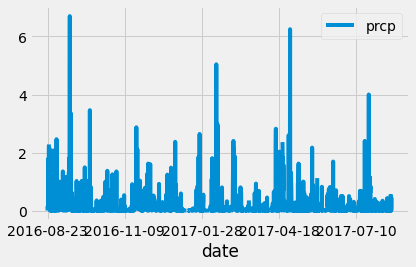

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
data_prcp_scores_df.plot(x='date', y='prcp')
plt.xlabel("date")
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_prcp_scores_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(Measurement).group_by(Measurement.station).count()
print("Total number of stations: ", station_total)

Total number of stations:  9


In [17]:
# Design a query to find the most active stations 
# (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_active = session.query(Measurement.station, func.count(Measurement.station).label('count')).\
    group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()

station_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_min = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

most_active_station_max = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

most_active_station_avg = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print("The minimum temperature for the most active station is: ", most_active_station_min)
print("The maximum temperature for the most active station is: ", most_active_station_max)
print("The average temperature for the most active station is: ", most_active_station_avg)

The minimum temperature for the most active station is:  [(54.0,)]
The maximum temperature for the most active station is:  [(85.0,)]
The average temperature for the most active station is:  [(71.66378066378067,)]


(0.0, 70.0)

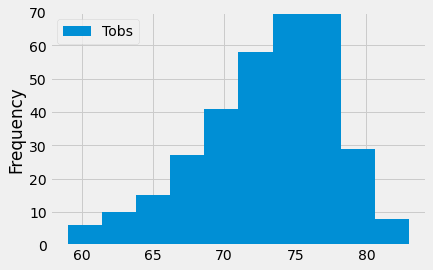

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(Measurement.tobs).\
    filter(Measurement.date >= year_from_last, Measurement.station == 'USC00519281').\
        order_by(Measurement.tobs).all()

df = pd.DataFrame(year_temp, columns=['Tobs'])
df.head()

df.plot.hist(year_temp)
plt.ylim(0,70)

# Close session

In [20]:
# Close Session
session.close()